In [7]:
# Parodomos pirmos penkios duomeų eilutės
import pandas as pd
file_path = "Iris.csv"
df = pd.read_csv(file_path)
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Text(0.5, 1.0, 'Sumaišties matrica pašalinus 40 Versicolor pavyzdžių (%)')

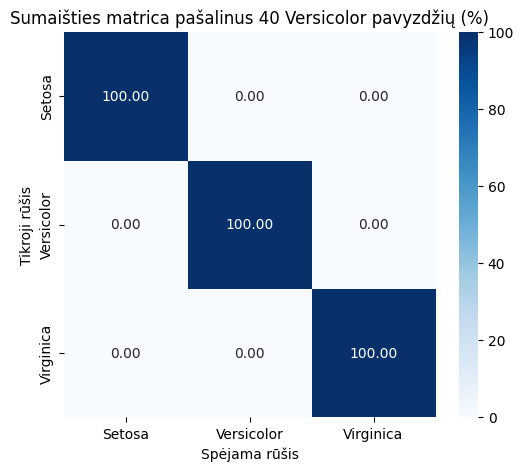

In [8]:
# Paliekami 10 versicolor pavyzdžių, MLP bando teisingai klasifikuoti
# Duomenų rinkinį, kuriame dirbtinai sukurta mažumos klasė
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["Species"] = iris.target

species_names = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
df["Species"] = df["Species"].map(species_names)

setosa_indices = df[df["Species"] == "Setosa"].index[:50]
versicolor_indices = df[df["Species"] == "Versicolor"].index[:10] 
virginica_indices = df[df["Species"] == "Virginica"].index[:50]

imbalanced_df = df.loc[setosa_indices.union(versicolor_indices).union(virginica_indices)].reset_index(drop=True)

X_imbalanced = imbalanced_df.drop(columns=["Species"])
y_imbalanced = imbalanced_df["Species"]

encoder = LabelEncoder()
y_imbalanced_encoded = encoder.fit_transform(y_imbalanced)

X_train_imbalanced, X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(
    X_imbalanced, y_imbalanced_encoded, test_size=0.2, random_state=42, stratify=y_imbalanced_encoded
)

scaler = StandardScaler()
X_train_imbalanced_scaled = scaler.fit_transform(X_train_imbalanced)
X_test_imbalanced_scaled = scaler.transform(X_test_imbalanced)

mlp_imbalanced = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp_imbalanced.fit(X_train_imbalanced_scaled, y_train_imbalanced)

y_pred_imbalanced = mlp_imbalanced.predict(X_test_imbalanced_scaled)

accuracy_imbalanced = accuracy_score(y_test_imbalanced, y_pred_imbalanced)
classification_rep_imbalanced = classification_report(y_test_imbalanced, y_pred_imbalanced, target_names=encoder.classes_)

cm_imbalanced = confusion_matrix(y_test_imbalanced, y_pred_imbalanced)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_imbalanced / cm_imbalanced.sum(axis=1)[:, np.newaxis] * 100, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)

plt.xlabel("Spėjama rūšis")
plt.ylabel("Tikroji rūšis")
plt.title("Sumaišties matrica pašalinus 40 Versicolor pavyzdžių (%)")